# PROBLEM 1 WORKING WITH BANK.CSV

In [38]:
import pandas as pd

# Load the CSV file
file_path = "Datasets/bank.csv" 
df = pd.read_csv(file_path)

print(df.head())

print(type(df))

print()
#using method .info()

df.info()
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns")



   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45

In [14]:
# Identify columns with dtype = object
object_columns = df.select_dtypes(include='object').columns 

#using .columns will give only the columns in the list form --Bizay 
#selecting all the columns which contains non numeric values ---Bizay
print(type(object_columns))
print(object_columns)





<class 'pandas.core.indexes.base.Index'>
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


now Iterating each columns to get what are the values that are included on that specific columns . It helps to get all the possible inputs 

In [18]:
for col in object_columns:
    print(f"All the unique values in Column {col}")
    print(df[col].unique())
    print()
    
    
    

All the unique values in Column job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

All the unique values in Column marital
['married' 'single' 'divorced']

All the unique values in Column education
['tertiary' 'secondary' 'unknown' 'primary']

All the unique values in Column default
['no' 'yes' ' ']

All the unique values in Column housing
['yes' 'no']

All the unique values in Column loan
['no' 'yes']

All the unique values in Column contact
['unknown' 'cellular' 'telephone']

All the unique values in Column month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

All the unique values in Column poutcome
['unknown' 'failure' 'other' 'success']

All the unique values in Column y
['no' 'yes']



In [26]:
#Checking the total number of null values in each columns

null_values = df.isnull().sum()
#if I want for only one sepcific columns

null_count_age=df['age'].isnull().sum()

print()
print(null_count_age)
print(null_values)


0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Its amazing that pandas provide us amazing methods that automatically gives the total null values for all the columns available. Just using the method df.isnull().sum

#The dtype: int64 at the end indicates that the values in the Series (which represent the count of null values for each column) are of integer type (int64).

In [34]:
#Now  exlcuding columns with dtypes object and then adding to new Dataframe in .csv file 
import os
new_df = df.select_dtypes(exclude='object')
print(new_df)

# df.to_csv('output.csv', index=False)---reference

new_df.to_csv('Datasets/banknumericdataa.csv',index=False)

#if I want to check whether its saved or not 
file_path = 'Datasets/banknumericdataa.csv'

if os.path.exists(file_path):
    print("File saved successfully!")
else:
    print("File not found.")

#now writing seleceted New Dataframe to another csv



       age  balance  day  duration  campaign  pdays  previous
0       58     2143    5       261         1     -1         0
1       44       29    5       151         1     -1         0
2       33        2    5        76         1     -1         0
3       47     1506    5        92         1     -1         0
4       33        1    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45206   51      825   17       977         3     -1         0
45207   71     1729   17       456         2     -1         0
45208   72     5715   17      1127         5    184         3
45209   57      668   17       508         4     -1         0
45210   37     2971   17       361         2    188        11

[45211 rows x 7 columns]
File saved successfully!


In [37]:
#FInding summary statistics of new csv file (banknumericdata.csv)

file_path = "Datasets/banknumericdata.csv" 
df = pd.read_csv(file_path)
print(df.head())


print("printing all the statistics)mean-median max quartile and everything")
summary_stats = df.describe()
print(summary_stats)

   age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0
printing all the statictics
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000  

# PROBLEM 2 WORKING WITH MEDICAL_STUDENT.CSV --dATA IMPUTATIONS

In [2]:
#loading the file
import pandas as pd
filepath="Datasets/medical_students_dataset.csv"
df=pd.read_csv(filepath)

print(df.head())

   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  


In [3]:
#using .info() method to check the columns with missing values (null)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [4]:
missing_values = df.isnull().sum()
print(missing_values)
print(type(missing_values))
print("using condition where sum is greater than 0")
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)




Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64
<class 'pandas.core.series.Series'>
using condition where sum is greater than 0
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


while filling missing values on the above columns I think  it depends upon what kind of data it is.
its necessary to identify whether its  numerical or categorial data .
for numerical datas --> methods like mean,median mode can be used 
for categorial data----> forward fill and backward fill would be the great option 

so first lets identify the type of data and then make decision



In [5]:
columns_with_missing_values = df.isnull().sum()[df.isnull().sum() > 0].index
print(columns_with_missing_values)


Index(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
       'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol',
       'Diabetes', 'Smoking'],
      dtype='object')


In [6]:
# Separate columns based on their data type
numerical_columns = df[columns_with_missing_values].select_dtypes(include='number').columns
categorical_columns = df[columns_with_missing_values].select_dtypes(include='object').columns
print("Numerical columns",numerical_columns)
print("categorical_columns",categorical_columns)




for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)


for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


print(df)

Numerical columns Index(['Student ID', 'Age', 'Height', 'Weight', 'BMI', 'Temperature',
       'Heart Rate', 'Blood Pressure', 'Cholesterol'],
      dtype='object')
categorical_columns Index(['Gender', 'Blood Type', 'Diabetes', 'Smoking'], dtype='object')
           Student ID        Age  Gender      Height     Weight Blood Type  \
0            1.000000  18.000000  Female  161.777924  72.354947          O   
1            2.000000  26.021561    Male  152.069157  47.630941          B   
2            3.000000  32.000000  Female  182.537664  55.741083          A   
3        49974.042078  30.000000    Male  182.112867  63.332207          B   
4            5.000000  23.000000  Female  174.947103  46.234173          O   
...               ...        ...     ...         ...        ...        ...   
199995   49974.042078  24.000000    Male  176.503260  95.756997          B   
199996   99997.000000  29.000000  Female  163.917675  45.225194          B   
199997   99998.000000  34.000000  Female  

In [9]:
print("now checking missing values has filled or not")
missing_values = df.isnull().sum()
print(missing_values)

now checking missing values has filled or not
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


In [10]:
#checking duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 12572


In [11]:
duplicates = df[df.duplicated()]
print("Duplicate rows:")
print(duplicates)


Duplicate rows:
        Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
100007         8.0  28.0    Male  186.489402  52.389752         AB  15.063921   
100011        12.0  34.0  Female  182.416302  76.371050         AB  22.950992   
100018        19.0  31.0  Female  158.790160  46.829849         AB  18.572723   
100022        23.0  29.0  Female  179.909041  90.679436         AB  28.015787   
100023        24.0  18.0    Male  174.947103  52.521560         AB  13.570402   
...            ...   ...     ...         ...        ...        ...        ...   
199965     99966.0  22.0  Female  166.562901  48.684146         AB  17.548137   
199973     99974.0  25.0  Female  156.297842  90.690186          B  37.123963   
199983     99984.0  26.0    Male  185.126825  95.531874          O  27.874661   
199985     99986.0  23.0  Female  162.884951  82.485778          B  31.089745   
199988     99989.0  28.0    Male  160.443722  55.688170          O  21.633037   

        Tem

In [14]:

df.drop_duplicates(keep='last', inplace=True)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

#this is how all the duplicate roes has been deleted 

Number of duplicate rows: 0


# Problem 3 Data cleaning and Transformation

In [1]:
import pandas as pd

df = pd.read_csv('Datasets/titanic_dataset.csv')

subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']] 

first_class_df = subset_df[subset_df['Pclass'] == 1]

print(first_class_df.head())


                                                 Name  Pclass     Sex   Age  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                             McCarthy, Mr. Timothy J       1    male  54.0   
11                           Bonnell, Miss. Elizabeth       1  female  58.0   
23                       Sloper, Mr. William Thompson       1    male  28.0   

       Fare  Survived  
1   71.2833         1  
3   53.1000         1  
6   51.8625         0  
11  26.5500         1  
23  35.5000         1  


In [27]:

mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()


print("Statistics for First-Class Passengers' Fare:")
print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Maximum Fare: {max_fare}")
print(f"Minimum Fare: {min_fare}")

Statistics for First-Class Passengers' Fare:
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


In [28]:
null_count = subset_df['Age'].isnull().sum()   

#checking if specific column is null or not using df['Age'].isnull().sum()---bizay  


print(f"Number of null values in the 'Age' column: {null_count}")

subset_df = subset_df.dropna(subset=['Age'])   

null_count_after = subset_df['Age'].isnull().sum()
print(f"Number of null values in 'Age' after dropping: {null_count_after}")

print(f"Updated DataFrame shape: {subset_df.shape}")


Number of null values in the 'Age' column: 177
Number of null values in 'Age' after dropping: 0
Updated DataFrame shape: (714, 6)


In [2]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

df = pd.concat([df, embarked_dummies], axis=1)

df = df.drop('Embarked', axis=1)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN           0           0           1  
1      0          PC 17599  71.2833   C85           1           0           0  
2      0  STON/O2. 3101282   7.9250   NaN           0           0           1  


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


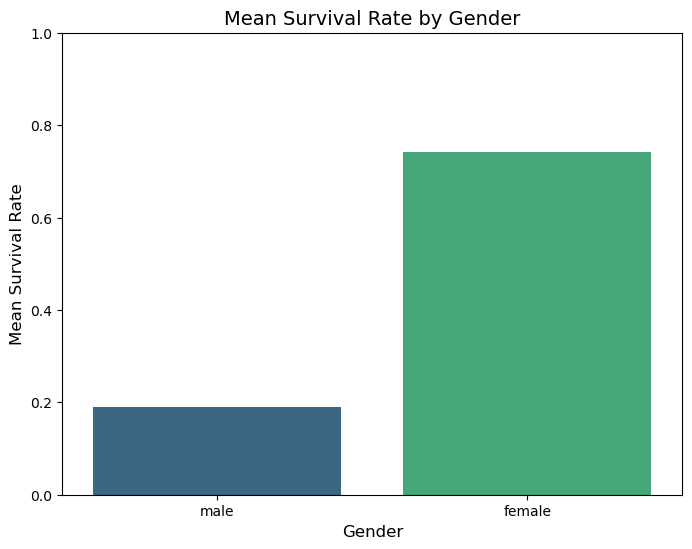

In [31]:

import matplotlib.pyplot as plt
import seaborn as sns


mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print(mean_survival_by_gender)


plt.figure(figsize=(8, 6))


sns.barplot(x='Sex', y='Survived', data=df, errorbar=None, palette='viridis')


# Add titles and labels
plt.title('Mean Survival Rate by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean Survival Rate', fontsize=12)
plt.ylim(0, 1)  # Survival rate ranges from 0 to 1

plt.show()


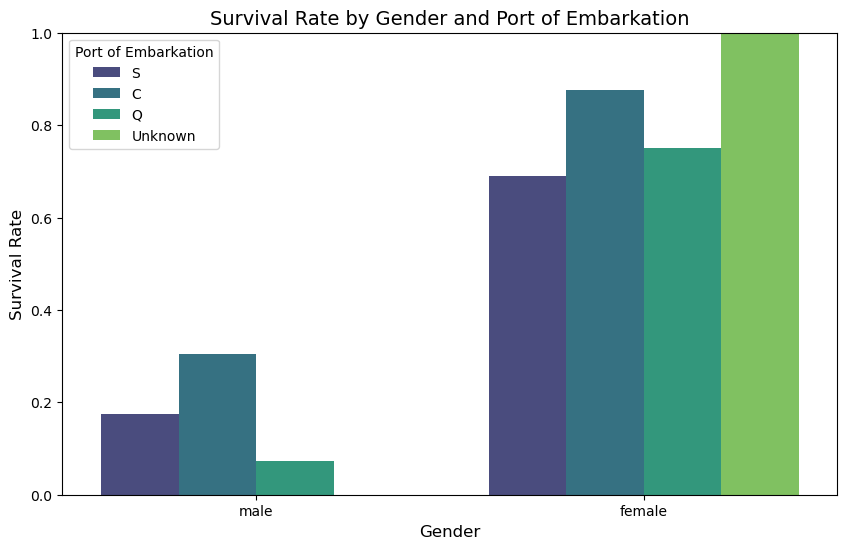

In [35]:
df = pd.read_csv('Datasets/titanic_dataset.csv')

df['Embarked'].fillna('Unknown', inplace=True)


plt.figure(figsize=(10, 6))

sns.barplot(
    x='Sex',
    y='Survived',
    hue='Embarked',
    data=df,
    errorbar=None,  
    palette='viridis'
)


plt.title('Survival Rate by Gender and Port of Embarkation', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1)  # Survival rates range from 0 to 1
plt.legend(title='Port of Embarkation', fontsize=10)

# Display the plot
plt.show()